# Instructions for what to do _before_ running this notebook

* Run file `PSAllModels.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Make sure to set all variables to the right values.
* This will save results similar to `Bbspr_2020_8_3_17_1_humans_n_samples20_map.pickle` (located, e.g., in `C:\Users\maria\MEGAsync\SLCN\PShumanData\fitting\mice`)
* Then run file `MAPResultPlots.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Again, make sure to set all variables to the right values.
* This will create several files in the folder of the original results, e.g., `params_Bbspr_session_388_pymc3.csv` and `nll_bics.csv`
* It will also save files `modelwise_LLs.csv`, `subjwise_LLs.csv`, etc. in the `plots` subfolder in this directory
* Once you have these files, run this notebook here

# Imports

In [34]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(style="white")
import matplotlib.pyplot as plt
import os

from Functions import get_info_from_fullID, add_meta_column

# Directories

In [2]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')
if not os.path.isdir(plot_save_dir):
    os.mkdir(plot_save_dir)

In [22]:
# winning_model_names = ['Bbspr', 'RLabnp2']
# winning_model_names = ['RLab', 'RLabj']
# winning_model_names = ['RLabcpnxd', 'Bbspr']
winning_model_names = ['RLabcpnxd4', 'Bbspr']  # Should be in order!

# Plot model fits

In [4]:
def model_2rt_param_letter(model_name):
    
    for letter in ['hj', 'hi', 'h4', 'h', 'i', 'j', 'k', '4']:
        if letter in model_name:
            return letter
            
# Example use
model_2rt_param_letter('hj'), model_2rt_param_letter('h'), model_2rt_param_letter('RLab')

('hj', 'h', None)

In [5]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits['rt_param_letter'] = model_fits.model_name.apply(model_2rt_param_letter)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC,rt_param_letter
0,Bbspr,session,383,109909.531250,53422.765625,109909.531250,None
1,RLabcpnxd4,session,383,111115.421875,52493.710938,111115.421875,4
2,RLabcpnxdh4,session,383,111288.796875,52197.398438,111288.796875,h4
3,RLabcpnxdi,session,383,111305.906250,52588.953125,111305.906250,i
4,RLabcpnxdj,session,383,111329.125000,52600.562500,111329.125000,j
5,RLabcpnxd,session,383,111378.742188,53008.371094,111378.742188,None
6,RLabcpnxdhi,session,383,111429.343750,52267.671875,111429.343750,hi
7,RLabcpnxdh,session,383,111449.187500,52660.593750,111449.187500,h
8,RLabcpnxdhj,session,383,111506.562500,52306.281250,111506.562500,hj
9,RLabcpnxdk,session,383,111649.164062,52760.582031,111649.164062,k


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_WAICs.png


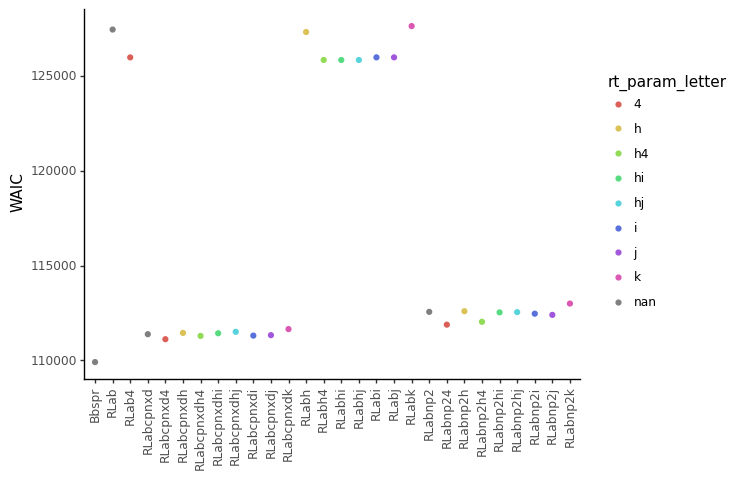

<ggplot: (140715987056)>

In [6]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC', color='rt_param_letter'))
     + gg.geom_point()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(x='')
)
g.save(os.path.join(plot_save_dir, '9_WAICs.png'))
g

In [7]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1208621,1307221,1307421,1307621,1307721,1307921,1308021,1308121,1308221,1308321
0,Bbspr,4,-120.936493,-158.549515,-180.643509,-114.966438,-98.239319,-110.326279,-130.702209,-94.997353,...,-93.639267,-143.633820,-155.563736,-105.001709,-121.865852,-115.502686,-164.467407,-128.151291,-123.640404,-153.418533
1,RLab4,3,-155.046097,-223.925003,-199.610825,-124.456421,-99.716560,-137.809616,-160.611725,-113.997696,...,-101.379784,-152.259018,-189.217651,-114.385849,-148.513123,-137.683090,-178.667831,-168.171265,-142.036865,-203.202744
2,RLabcpnxd4,8,-118.731865,-157.151825,-173.676132,-112.261681,-90.263161,-107.032829,-129.682434,-89.559845,...,-88.059944,-146.041473,-154.230270,-100.467232,-122.361496,-108.880424,-161.271011,-123.117485,-119.159416,-146.667511
3,RLabcpnxdh4,9,-118.636009,-154.738327,-169.066055,-111.801125,-90.266479,-106.396034,-128.457535,-89.421310,...,-87.780846,-145.960693,-154.232529,-97.141914,-120.402740,-108.869225,-161.171692,-119.891533,-116.702507,-146.667068
4,RLabcpnxdhi,9,-118.651695,-154.848526,-170.177032,-112.761635,-90.650269,-106.455849,-128.401093,-89.523819,...,-88.469734,-146.320526,-154.753983,-100.880867,-121.055885,-108.750359,-161.120422,-120.786484,-116.778938,-146.922546
5,RLabcpnxdhj,9,-118.548668,-154.794754,-170.460205,-111.128555,-90.584381,-106.204971,-128.386978,-89.787399,...,-87.609970,-145.750916,-154.186920,-96.811806,-121.220543,-108.844711,-161.133606,-119.970314,-116.788559,-146.654449
6,RLabcpnxdh,8,-119.005028,-155.133942,-171.597244,-114.121078,-90.653877,-108.733887,-128.756073,-91.105034,...,-88.619812,-146.847977,-155.487656,-101.535973,-124.716324,-109.041519,-161.624649,-122.628555,-118.187271,-147.822678
7,RLabcpnxdi,8,-118.845879,-157.323990,-174.565628,-113.130646,-90.657112,-107.051224,-129.658783,-89.834846,...,-88.811287,-146.491531,-154.840988,-100.897636,-122.353958,-108.734314,-161.244705,-123.932419,-119.646172,-146.924484
8,RLabcpnxdj,8,-118.637634,-157.263199,-174.621765,-111.575043,-90.592796,-106.697884,-129.665497,-90.035683,...,-87.885841,-145.803558,-154.187592,-100.167770,-122.784889,-108.850632,-161.230560,-123.066811,-119.085548,-146.654999
9,RLabcpnxdk,8,-119.078827,-157.859940,-176.543213,-112.990868,-90.657745,-109.130356,-129.613968,-91.092850,...,-88.069168,-146.593033,-155.521164,-100.300751,-123.164253,-109.050232,-161.727692,-124.633072,-120.385345,-147.058304


In [8]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
animal_colnames = ['fullID', 'agegroup', 'sex', 'age', 'animal']
for col in animal_colnames[1:]:
    fits_[col] = fits_.fullID.apply(get_info_from_fullID, column_name=col)
fits_['rt_param_letter'] = fits_.model_name.apply(model_2rt_param_letter)
fits_

,model_name,n_params,fullID,LL,AIC,BIC,agegroup,sex,age,animal,rt_param_letter
0,Bbspr,4,1404012,-120.936493,249.872986,268.217672,Juvenile,Male,40,14,None
1,RLab4,3,1404012,-155.046097,316.092194,329.850709,Juvenile,Male,40,14,4
2,RLabcpnxd4,8,1404012,-118.731865,253.463730,290.153103,Juvenile,Male,40,14,4
3,RLabcpnxdh4,9,1404012,-118.636009,255.272018,296.547563,Juvenile,Male,40,14,h4
4,RLabcpnxdhi,9,1404012,-118.651695,255.303391,296.578935,Juvenile,Male,40,14,hi
...,...,...,...,...,...,...,...,...,...,...,...
10719,RLabnp2i,6,1308321,-153.468262,318.936523,346.453553,Adult,Female,83,13,i
10720,RLabnp2j,6,1308321,-152.913513,317.827026,345.344056,Adult,Female,83,13,j
10721,RLabnp2k,6,1308321,-153.636017,319.272034,346.789064,Adult,Female,83,13,k
10722,RLabnp2,5,1308321,-154.404709,318.809418,341.740276,Adult,Female,83,13,None


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_LLs.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_BICs.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_AICs.png


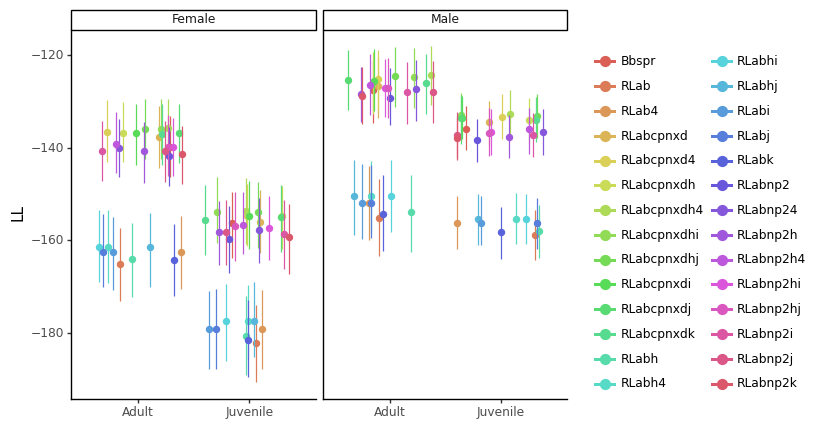

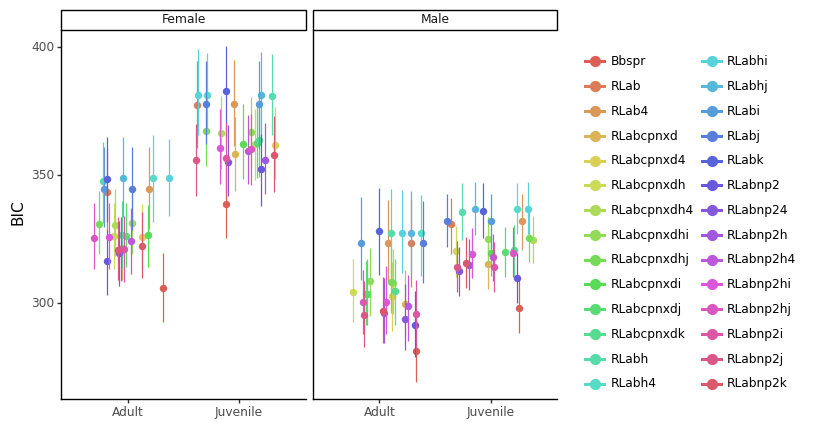

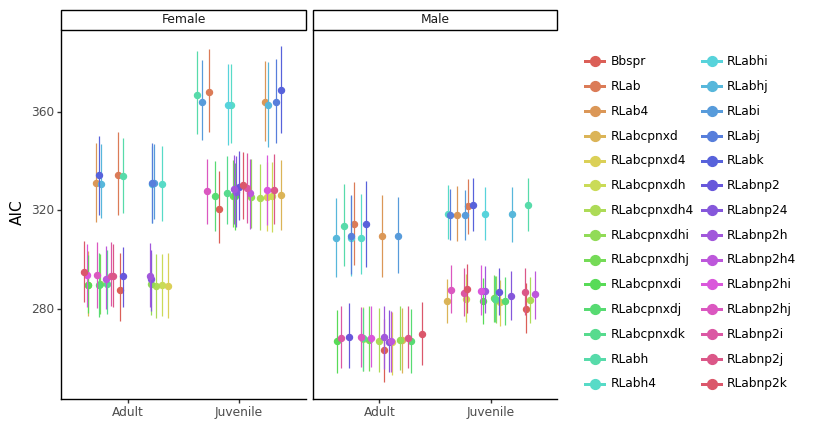

In [9]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ sex')
     + gg.labs(x='', color='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '9_{}s.png'.format(yax)))

In [10]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=animal_colnames, values='AIC')

for col in AICs.columns:
    ref_col = winning_model_names[0]
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='sex') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=animal_colnames, value_name='AIC')
AICs_rel

,fullID,agegroup,sex,age,animal,model_name,AIC
0,1007521,Adult,Female,75,10,Bbspr_minus_RLabcpnxd4,-8.089401
1,1007621,Adult,Female,76,10,Bbspr_minus_RLabcpnxd4,-3.852905
2,1007721,Adult,Female,77,10,Bbspr_minus_RLabcpnxd4,18.367554
3,1007821,Adult,Female,78,10,Bbspr_minus_RLabcpnxd4,-3.870087
4,1007921,Adult,Female,79,10,Bbspr_minus_RLabcpnxd4,-3.779007
...,...,...,...,...,...,...,...
10719,907921,Adult,Female,79,9,RLabnp2k_minus_RLabcpnxd4,4.317444
10720,908121,Adult,Female,81,9,RLabnp2k_minus_RLabcpnxd4,15.519684
10721,908221,Adult,Female,82,9,RLabnp2k_minus_RLabcpnxd4,1.545197
10722,908321,Adult,Female,83,9,RLabnp2k_minus_RLabcpnxd4,11.671570


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_RelativeAICs2.png


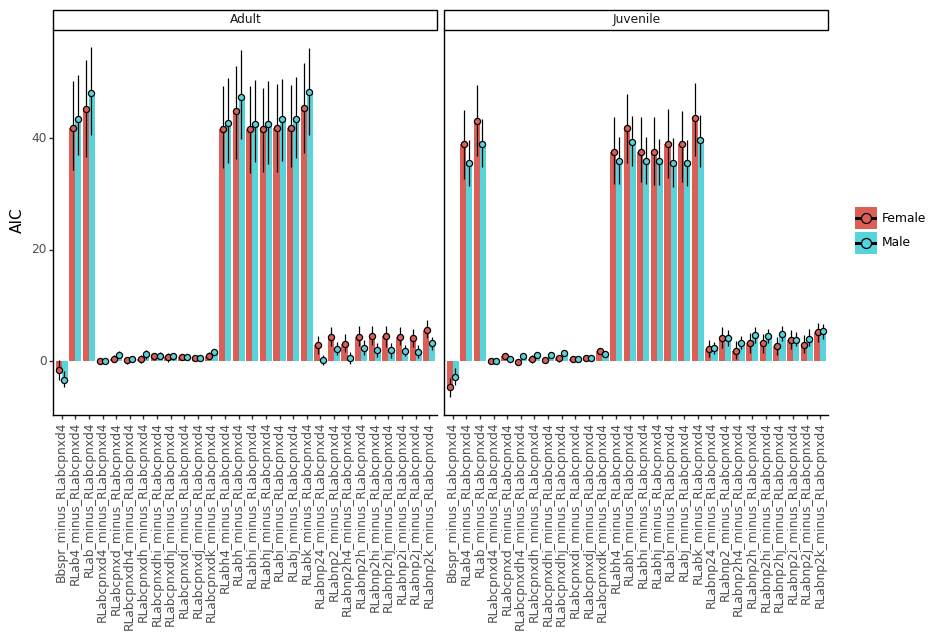

In [11]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='sex'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
 + gg.labs(x='', fill='')
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, '9_RelativeAICs2.png'))

# Load fitted parameters

In [12]:
# Load
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        
        new_params = pd.read_csv(os.path.join(param_dir, file))
        new_params['agegroup'] = new_params.sID.apply(get_info_from_fullID, column_name='agegroup')
        all_params = all_params.append(new_params)

# Preprocess        
all_params['agegroup'] = pd.Categorical(all_params['agegroup'], ordered=True, categories=('Juvenile', 'Adult'))
# all_params = all_params.rename(columns={'Gender': 'sex', 'PreciseYrs': 'age'})
all_params['meta'] = add_meta_column(all_params)
all_params = all_params.drop(columns=
                             ['PDS', 'T1', 'cnalpha_rew', 'slope_variable', 'fullID', 'age_z'])  #, 'p_noisy'
all_params = all_params.loc[all_params.meta != 'nan']
# all_params.beta /= 15
all_params

,beta,persev,bias,p_noisy,p_switch,p_reward,sID,agegroup,sex,age,...,rta,crta,nrta,cnrta,alpha,nalpha,rtb,calpha,cnalpha,meta
0,3.573277,0.321775,0.0,0.00001,0.185938,0.862980,1404012,Juvenile,Male,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-3
1,2.755208,0.353098,0.0,0.00001,0.174708,0.897763,1404112,Juvenile,Male,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-3
2,1.698398,0.459071,0.0,0.00001,0.000456,0.999842,1404212,Juvenile,Male,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-3
3,14.892703,0.092737,0.0,0.00001,0.330944,0.724270,1404312,Juvenile,Male,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-8
4,14.992540,0.022457,0.0,0.00001,0.304446,0.332223,1404412,Juvenile,Male,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,4.936704,0.000000,0.0,NaN,NaN,NaN,1307921,Adult,Female,79,...,0.0,0.0,0.0,0.0,0.658873,0.658873,0.0,0.0,0.0,4-8
379,3.405244,0.000000,0.0,NaN,NaN,NaN,1308021,Adult,Female,80,...,0.0,0.0,0.0,0.0,0.781801,0.781801,0.0,0.0,0.0,4-8
380,3.982055,0.000000,0.0,NaN,NaN,NaN,1308121,Adult,Female,81,...,0.0,0.0,0.0,0.0,0.680646,0.680646,0.0,0.0,0.0,4-8
381,4.945253,0.000000,0.0,NaN,NaN,NaN,1308221,Adult,Female,82,...,0.0,0.0,0.0,0.0,0.774422,0.774422,0.0,0.0,0.0,4-8


In [13]:
animal_colnames = ['sID', 'session', 'agegroup', 'sex', 'age', 'animal', 'meta']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
# all_params_long = add_meta_column(all_params_long)
all_params_long

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
0,1404012,0.0,Juvenile,Male,40,14,1-3,Bbspr,beta,3.573277
1,1404112,1.0,Juvenile,Male,41,14,1-3,Bbspr,beta,2.755208
2,1404212,2.0,Juvenile,Male,42,14,1-3,Bbspr,beta,1.698398
3,1404312,3.0,Juvenile,Male,43,14,4-8,Bbspr,beta,14.892703
4,1404412,4.0,Juvenile,Male,44,14,4-8,Bbspr,beta,14.992540
...,...,...,...,...,...,...,...,...,...,...
160472,1307921,4.0,Adult,Female,79,13,4-8,RLabnp2,cnalpha,0.503552
160473,1308021,5.0,Adult,Female,80,13,4-8,RLabnp2,cnalpha,0.541099
160474,1308121,6.0,Adult,Female,81,13,4-8,RLabnp2,cnalpha,0.481638
160475,1308221,7.0,Adult,Female,82,13,4-8,RLabnp2,cnalpha,0.414907


# Plotting functions

In [14]:
def subset_model_data(data, model_name):
    
    win_mod_sub = data.model == model_name
    not_nan_sub = np.invert(np.isnan(data.loc[win_mod_sub, 'param_value']))
    sub_dat = data[np.logical_and(win_mod_sub, not_nan_sub)]

    return sub_dat

# # Example use
# plotted_model_name = winning_model_names[0]
# sub_dat = subset_model_data(all_params_long, plotted_model_name)

In [15]:
def plot_session_params(data, winning_model_name):

    gg.options.figure_size = (8, 5)
    
    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('session', 'param_value', color='agegroup'))
     + gg.geom_point(alpha=0.5)
     + gg.geom_smooth()
#      + gg.coord_cartesian(xlim=(0, 12))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(y='')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
    )

    save_dir = os.path.join(plot_save_dir, '10_ParamsSession_{}.png'.format(winning_model_name))
    print("Saving to {}".format(save_dir))
    g.save(save_dir)
    gg.options.figure_size = (5, 5)

    
    return g
    
# # Example use
# plot_session_params(sub_dat, plotted_model_name)

In [16]:
def plot_meta_params(data, winning_model_name):

    # Males only
    sub_dat_male = data[data.sex == 'Male']
    g_male = (gg.ggplot(sub_dat_male, gg.aes('meta', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
#      + gg.coord_cartesian(ylim=(0, 1))  # adapt for BF (0, 0.8) vs RL (0, 1)
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5),
                legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ agegroup + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('agegroup ~ param_name')
    )
    g_male.save(os.path.join(plot_save_dir, '11_ParamsMetaMale_{}.png'.format(winning_model_name)))
    
    # Females only
    g_female = g_male
    g_female.data = data[data.sex == 'Female']
    g_female.save(os.path.join(plot_save_dir, '11_ParamsMetaFemale_{}.png'.format(winning_model_name)))
    
    return g_female
    
# # Example use
# plot_meta_params(sub_dat, plotted_model_name)

In [17]:
def plot_agegroup_params(data, winning_model_name):

    ## Males only
    gg.options.figure_size = (8, 5)
    sub_dat_male = data[data.sex == 'Male']
    g_m = (gg.ggplot(sub_dat_male, gg.aes('agegroup', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5),
                legend_position='none')
#      + gg.coord_cartesian(ylim=(-0.1, 1))
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ meta + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('meta ~ param_name')
    )
    g_m.save(os.path.join(plot_save_dir, '12_ParamsAgegroupMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_f = g_m
    g_f.data = data[data.sex == 'Female']
    g_f.save(os.path.join(plot_save_dir, '12_ParamsAgegroupFemale_{}.png'.format(winning_model_name)))
    gg.options.figure_size = (5, 5)

    return g_f
    
# # Example use
# plot_agegroup_params(sub_dat, plotted_model_name)

In [18]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    gg.options.figure_size = (8, 5)
    g = (gg.ggplot(data, gg.aes('age', 'param_value', color='sex'))
     + gg.geom_point()
     + gg.geom_smooth(color='black')
#      + gg.facet_grid('sex ~ param_name')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
     + gg.labs(x='Age', y='')
    )
    g.save(os.path.join(plot_save_dir, '13_ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))
    gg.options.figure_size = (5, 5)
    
    return g
    
# # Example use
# plot_age_params(sub_dat, plotted_model_name)

In [19]:
def update_q(old_q, alpha, rpe, rt, rta):
    
    rta_ = rta * (rt - 1) + 1
    return old_q + (rta_ * alpha * rpe)

# Example
update_q(old_q=0.5, alpha=0.5, rpe=0.2, rt=0.2, rta=-0.2)

0.616

## Plot winning models

In [46]:
plotted_model_name = 'Bbspr'  # 'RLabcpnxd4'

win_mod_sub = all_params_long.model == plotted_model_name
not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]

In [47]:
sub_dat

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
0,1404012,0.0,Juvenile,Male,40,14,1-3,Bbspr,beta,3.573277
1,1404112,1.0,Juvenile,Male,41,14,1-3,Bbspr,beta,2.755208
2,1404212,2.0,Juvenile,Male,42,14,1-3,Bbspr,beta,1.698398
3,1404312,3.0,Juvenile,Male,43,14,4-8,Bbspr,beta,14.892703
4,1404412,4.0,Juvenile,Male,44,14,4-8,Bbspr,beta,14.992540
...,...,...,...,...,...,...,...,...,...,...
53998,1307921,4.0,Adult,Female,79,13,4-8,Bbspr,p_reward,0.374793
53999,1308021,5.0,Adult,Female,80,13,4-8,Bbspr,p_reward,0.965572
54000,1308121,6.0,Adult,Female,81,13,4-8,Bbspr,p_reward,0.566060
54001,1308221,7.0,Adult,Female,82,13,4-8,Bbspr,p_reward,0.156702


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 6445 rows containing non-finite values.


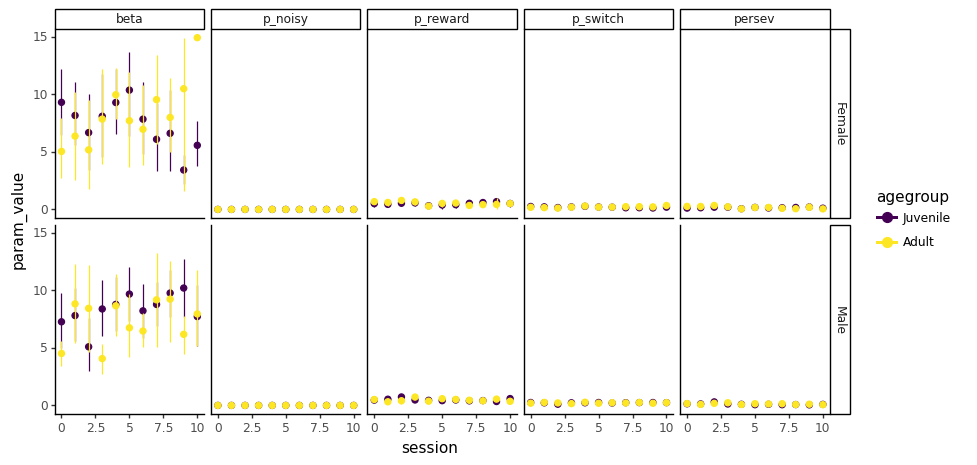

<ggplot: (140728070837)>

In [48]:
subj_dat = sub_dat.groupby(['sex', 'animal', 'agegroup', 'session', 'param_name']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('session', 'param_value', color='agegroup'))
     + gg.stat_summary()
     + gg.facet_grid('sex ~ param_name')
    )
g

In [49]:
sub_dat = subj_dat.loc[
    (subj_dat['param_name'] == 'p_reward')
].dropna()

smf.mixedlm('param_value ~ session * agegroup', data=sub_dat, groups=sub_dat['animal']).fit().summary()

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2118: ConvergenceWarnin

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
====================================================================
Model:                 MixedLM    Dependent Variable:    param_value
No. Observations:      383        Method:                REML       
No. Groups:            38         Scale:                 0.1023     
Min. group size:       4          Log-Likelihood:        -139.5758  
Max. group size:       11         Converged:             No         
Mean group size:       10.1                                         
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  0.515    0.048 10.756 0.000  0.421  0.609
agegroup[T.Adult]          0.052    0.082  0.632 0.527 -0.109  0.212
session                   -0.007    0.007 -1.077 0.281 -0.021  0.006
session:agegroup[T.Adult] -0.007    0.012 -0.589 0.556 -0.029  0.016
Group Var                  0.023    0.062                           
====================================================================

"""

In [20]:
for plotted_model_name in winning_model_names:

    print('Plotting {}.'.format(plotted_model_name))
    
    # Subset model data
    win_mod_sub = all_params_long.model == plotted_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, plotted_model_name)
    plot_meta_params(sub_dat, plotted_model_name)
    plot_agegroup_params(sub_dat, plotted_model_name)
    plot_age_params(sub_dat, plotted_model_name)

Plotting RLabcpnxd4.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabcpnxd4.png


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabcpnxd4.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/1

Plotting RLabnp24.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabnp24.png


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabnp24.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_

# Parameter correlations between models

In [21]:
BF_params = all_params[all_params.model == winning_model_names[0]]
RL_params = all_params[all_params.model == winning_model_names[1]]
RL_params

winning_params = RL_params.drop(columns=['model']).merge(
    BF_params.drop(columns=['model']), on=animal_colnames, suffixes=['_RL', '_BF'])
winning_params = winning_params.drop(columns=[
    'alpha_BF', 'calpha_BF', 'cnalpha_BF', 'nalpha_BF', 'p_reward_RL', 'p_switch_RL', 'bias_BF'])
winning_params

,beta_RL,persev_RL,bias_RL,p_noisy_RL,sID,agegroup,sex,age,animal,session,...,beta_BF,persev_BF,p_noisy_BF,p_switch_BF,p_reward_BF,rta_BF,crta_BF,nrta_BF,cnrta_BF,rtb_BF
0,2.821810,0.982658,0.0,NaN,1404012,Juvenile,Male,40,14,0.0,...,2.849645,0.977221,NaN,NaN,NaN,-0.264027,-0.243116,0.355202,0.361415,0.0
1,1.863845,0.996651,0.0,NaN,1404112,Juvenile,Male,41,14,1.0,...,1.880015,0.996999,NaN,NaN,NaN,-0.156364,-0.294273,0.553173,-0.012938,0.0
2,1.663224,0.925094,0.0,NaN,1404212,Juvenile,Male,42,14,2.0,...,2.266818,0.474837,NaN,NaN,NaN,0.076635,-0.535723,0.885098,-0.203363,0.0
3,4.417085,0.661793,0.0,NaN,1404312,Juvenile,Male,43,14,3.0,...,4.874597,0.519543,NaN,NaN,NaN,-0.115959,-0.500560,-0.934781,-0.613683,0.0
4,7.920196,0.147897,0.0,NaN,1404412,Juvenile,Male,44,14,4.0,...,14.892414,0.068650,NaN,NaN,NaN,0.036761,0.000035,-0.486022,0.301549,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2.723638,0.698993,0.0,NaN,1307921,Adult,Female,79,13,4.0,...,3.416003,0.440261,NaN,NaN,NaN,-0.105569,-0.105568,0.248598,0.248597,0.0
379,2.177068,0.596931,0.0,NaN,1308021,Adult,Female,80,13,5.0,...,2.362282,0.479181,NaN,NaN,NaN,-0.216004,-0.216004,0.372999,0.372997,0.0
380,2.911290,0.516583,0.0,NaN,1308121,Adult,Female,81,13,6.0,...,4.141008,0.263642,NaN,NaN,NaN,0.255114,0.640825,-0.663366,-0.387794,0.0
381,2.991637,0.468386,0.0,NaN,1308221,Adult,Female,82,13,7.0,...,3.559137,0.315252,NaN,NaN,NaN,-0.188531,-0.372633,0.727641,0.474082,0.0


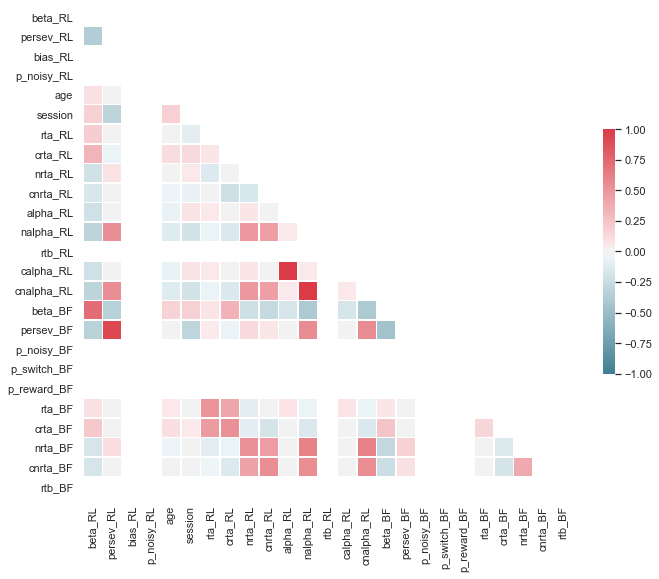

In [22]:
# Compute the correlation matrix
corr = winning_params.drop(columns=['animal', 'sID']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join(plot_save_dir, '14_CorrelationMatrix.png'))

# Vizualize the effects of RT parameters rta and rtb

In [23]:
# Create data for vizualization
rpe = 0.2

rta_dat = pd.DataFrame()

for alpha in [0.1, 0.5, 0.9]:
    for old_q in [0.4, 0.5, 0.6]:
        for rt in [0, 0.3, 0.6, 0.9]:
            for rta in [-0.4, -0.2, 0, 0.2, 0.4]:

                new_q = update_q(old_q=old_q, alpha=alpha, rpe=rpe, rt=rt, rta=rta)
                new_row = pd.DataFrame(
                    {'old_q': [old_q], 'alpha': [alpha], 'rpe': [rpe], 'rt': [rt], 'rta': [rta], 'new_q': [new_q]})

                rta_dat = pd.concat([rta_dat, new_row])
        
rta_dat

,old_q,alpha,rpe,rt,rta,new_q
0,0.4,0.1,0.2,0.0,-0.4,0.4280
0,0.4,0.1,0.2,0.0,-0.2,0.4240
0,0.4,0.1,0.2,0.0,0.0,0.4200
0,0.4,0.1,0.2,0.0,0.2,0.4160
0,0.4,0.1,0.2,0.0,0.4,0.4120
...,...,...,...,...,...,...
0,0.6,0.9,0.2,0.9,-0.4,0.7872
0,0.6,0.9,0.2,0.9,-0.2,0.7836
0,0.6,0.9,0.2,0.9,0.0,0.7800
0,0.6,0.9,0.2,0.9,0.2,0.7764


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/20_Understand_rta.png


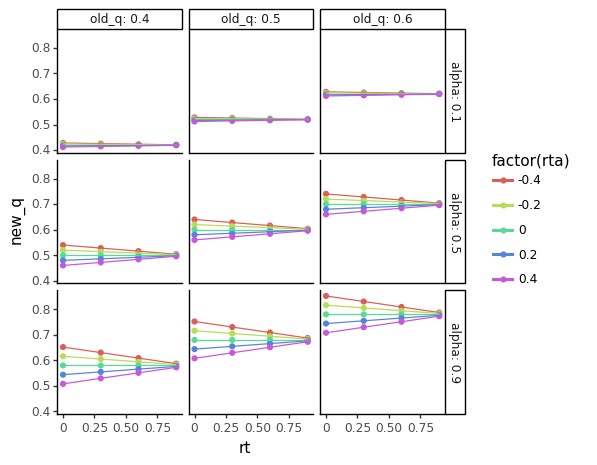

<ggplot: (82814522688)>

In [24]:
# Bottom line:
    # positive rta: longer rts => larger updates
    # negative rta: longer rts => smaler updates
    # rta == 0: no effect of rts on updates
    # larger alpha: larger effect of rts
    # larger old_q: no difference
gg.options.figure_size = (5, 5)
g = (gg.ggplot(rta_dat, gg.aes('rt', 'new_q', color='factor(rta)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.facet_grid('alpha ~ old_q', labeller='label_both')
)
g.save(os.path.join(plot_save_dir, '20_Understand_rta.png'))
g

In [25]:
def p_from_qs(q_diff, beta, bias, rtb, rt):
    
    rtb_ = rtb * (rt - 1) + 1
    return 1 / (1 + np.exp(rtb_ * beta * (q_diff + bias)))

# Example use
p_from_qs(q_diff=0.3, beta=2, bias=0, rtb=0.2, rt=0.5)

0.3681875822638983

In [26]:
# Create data for vizualization
rtb_dat = pd.DataFrame()

bias = 0
for q_diff in [-0.3, 0, 0.3]:
    for beta in [0.1, 1, 3]:
        for rt in [0, 0.3, 0.6, 0.9]:
            for rtb in [-0.4, -0.2, 0, 0.2, 0.4]:

                p = p_from_qs(q_diff=q_diff, beta=beta, bias=bias, rtb=rtb, rt=rt)
                new_row = pd.DataFrame(
                    {'q_diff': [q_diff], 'beta': [beta], 'bias': [bias], 'rt': [rt], 'rtb': [rtb], 'p': [p]})

                rtb_dat = pd.concat([rtb_dat, new_row])
        
rtb_dat

,q_diff,beta,bias,rt,rtb,p
0,-0.3,0.1,0,0.0,-0.4,0.510498
0,-0.3,0.1,0,0.0,-0.2,0.508999
0,-0.3,0.1,0,0.0,0.0,0.507499
0,-0.3,0.1,0,0.0,0.2,0.506000
0,-0.3,0.1,0,0.0,0.4,0.504500
...,...,...,...,...,...,...
0,0.3,3.0,0,0.9,-0.4,0.281709
0,0.3,3.0,0,0.9,-0.2,0.285366
0,0.3,3.0,0,0.9,0.0,0.289050
0,0.3,3.0,0,0.9,0.2,0.292764


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/20_Understand_rtb.png


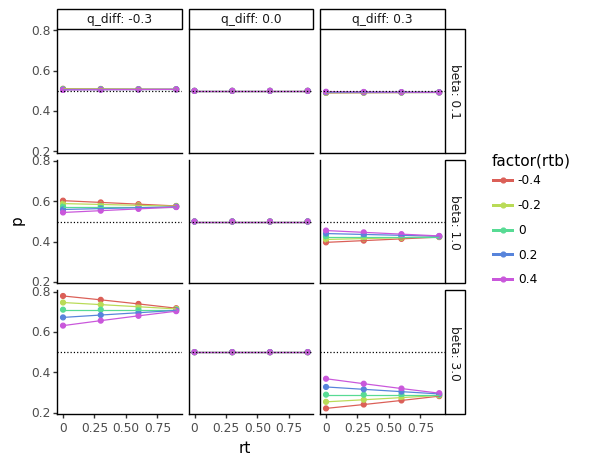

<ggplot: (82819204976)>

In [27]:
g = (gg.ggplot(rtb_dat, gg.aes('rt', 'p', color='factor(rtb)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.geom_hline(yintercept=0.5, linetype='dotted')
     + gg.facet_grid('beta ~ q_diff', labeller='label_both')
    )
g.save(os.path.join(plot_save_dir, '20_Understand_rtb.png'))
g

## Stats on parameter differences

In [28]:
import statsmodels.formula.api as smf

all_models = pd.DataFrame()

for param in ['alpha_RL', 'beta_RL', 'bias_RL', 'calpha_RL', 'cnalpha_RL', 'nalpha_RL', 'persev_RL',
              'beta_BF', 'p_reward_BF', 'p_switch_BF', 'persev_BF']:
    mod = smf.ols(
        formula='{} ~ (session + sex + agegroup) * (session + sex + agegroup)'.format(param),
        data=winning_params).fit()
    
    p = pd.DataFrame(mod.pvalues, columns=['p'])
    c = pd.DataFrame(mod.params, columns=['coef'])
    c['param'] = param

    mod_dat = p.merge(c, left_index=True, right_index=True)
    mod_dat
    
    all_models = all_models.append(mod_dat)

all_models['sig'] = ['sig' if p > 0.05 else 'ns' for p in all_models.p]
all_models = all_models.reset_index()
all_models = all_models.replace({
#     'sex[T.Male]': 'Sex', 'PreciseYrs': 'Age', 'PreciseYrs:sex[T.Male]': 'Interaction'
#     'sex[T.Male]': 'Sex', 'session:sex[T.Male]': 'Interaction'
    'sex[T.Male]': 'Sex', 'session': 'Session', 'agegroup[T.adult]': 'Agegroup',
    'sex[T.Male]:agegroup[T.adult]': 'Sex:Agegroup',
    'session:sex[T.Male]': 'Session:Sex',
    'session:agegroup[T.adult]': 'Session:Agegroup'
})
all_models = all_models.rename(columns={'index': 'effect'})
all_models.effect = pd.Categorical(all_models.effect, ordered=True,
#                                    categories=['Age', 'Sex', 'Interaction', 'Intercept']
#                                    categories=['session', 'Sex', 'Interaction', 'Intercept']
                                   categories=['Session', 'Agegroup', 'Sex',
                                               'Session:Agegroup', 'Session:Sex', 'Sex:Agegroup',
                                               'Intercept']
                                  )
all_models

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
g = (gg.ggplot(all_models, gg.aes('param', 'coef', fill='sig', color='sig'))#, color='param'))
     + gg.geom_bar(stat='identity')
     + gg.scale_fill_manual(values=['white', 'darkgrey'])
     + gg.scale_color_manual(values=['lightgrey', 'black'])
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(x='')
     + gg.facet_wrap('~ effect', scales='free')
)
g.save(os.path.join(plot_save_dir, '15_RegrModels.png'))
g.draw()

# OLD

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)